In [1]:
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import load_iris
import torch

### Creating a neural network:

In [2]:
class Model(torch.nn.Module):
    def __init__(self, in_features=4, neuron_layer1=8, neuron_layer2=8, out_features=3):
        super().__init__()
        self.step1 = torch.nn.Linear(in_features, neuron_layer1)
        self.step2 = torch.nn.Linear(neuron_layer1, neuron_layer2)
        self.output = torch.nn.Linear(neuron_layer2, out_features)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.step1(x))
        x = torch.nn.functional.relu(self.step2(x))
        logit = self.output(x)
        
        return logit

### Defining a seed and creating an instance:

In [3]:
torch.manual_seed(33)
model = Model()

### Preparing the data:

In [4]:
x, y = load_iris(as_frame=True, return_X_y=True)

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x.values, y.values, test_size=0.2, random_state=33)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Setting the optmizer

In [5]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Training the model:

In [6]:
epochs = 100

errors = []

for i in range(epochs):
    y_prediction = model.forward(x_train)
    
    error = loss(y_prediction, y_train)
    errors.append(error.detach().numpy())
    
    if i % 10 == 0:
        print(f'Epoch: {i} \t Error rate: {error}')
    
    optimizer.zero_grad()
    error.backward()
    optimizer.step()

Epoch: 0 	 Error rate: 1.232382893562317
Epoch: 10 	 Error rate: 1.0233701467514038
Epoch: 20 	 Error rate: 0.7572022676467896
Epoch: 30 	 Error rate: 0.48167601227760315
Epoch: 40 	 Error rate: 0.33288100361824036
Epoch: 50 	 Error rate: 0.2140192836523056
Epoch: 60 	 Error rate: 0.13153988122940063
Epoch: 70 	 Error rate: 0.09171650558710098
Epoch: 80 	 Error rate: 0.07476557791233063
Epoch: 90 	 Error rate: 0.06648612767457962


### Visualizing the results:

Text(0, 0.5, 'Error Rate')

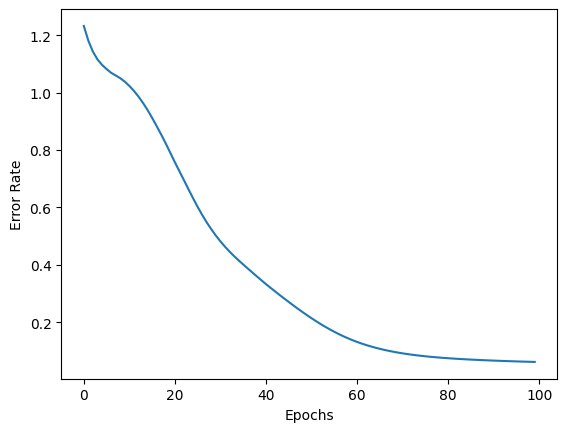

In [7]:
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error Rate')

### Validation of the training

In [8]:
with torch.no_grad():
    y_validation = model.forward(x_test)
    error = loss(y_validation, y_test)
    
print(f'Error rate without gradient reajust: {error}')

Error rate without gradient reajust: 0.06636950373649597


### Final results:

In [9]:
def iris_type(y):
    match y:
        case 0:
            y = 'Setosa'
            
        case 1:
            y = 'Versicolor'
            
        case 2:
            y = 'Virginica'
    return y

with torch.no_grad():
    right = 0
    wrong = 0
    
    for i, input_data in enumerate(x_test):
        y_guess = model.forward(input_data)
        y_guess = y_guess.argmax().item()
        
        print(f'IA answer: {iris_type(y_guess)} \t Real answer: {iris_type(y_test[i])}')
        
        if y_guess == y_test[i]:
            right += 1
        else:
            wrong += 1

print(f'\nRight: {right} \t Wrong: {wrong}')

IA answer: Versicolor 	 Real answer: Versicolor
IA answer: Versicolor 	 Real answer: Versicolor
IA answer: Setosa 	 Real answer: Setosa
IA answer: Versicolor 	 Real answer: Versicolor
IA answer: Virginica 	 Real answer: Virginica
IA answer: Virginica 	 Real answer: Virginica
IA answer: Setosa 	 Real answer: Setosa
IA answer: Setosa 	 Real answer: Setosa
IA answer: Virginica 	 Real answer: Virginica
IA answer: Virginica 	 Real answer: Virginica
IA answer: Virginica 	 Real answer: Virginica
IA answer: Setosa 	 Real answer: Setosa
IA answer: Virginica 	 Real answer: Virginica
IA answer: Versicolor 	 Real answer: Versicolor
IA answer: Virginica 	 Real answer: Virginica
IA answer: Versicolor 	 Real answer: Versicolor
IA answer: Versicolor 	 Real answer: Virginica
IA answer: Setosa 	 Real answer: Setosa
IA answer: Versicolor 	 Real answer: Versicolor
IA answer: Virginica 	 Real answer: Virginica
IA answer: Setosa 	 Real answer: Setosa
IA answer: Setosa 	 Real answer: Setosa
IA answer: Virgin